In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Data Loading

In [95]:
df = pd.read_csv("ASX_Listed_Companies_23-06-2021_10-32-50_AEST.csv")
df = df.drop_duplicates(subset="Company name")
df.head(2)

df_200 = (df.sort_values(by=["Market Cap"], ascending=False, na_position="last")).head(200)

In [88]:
df.describe(include="all")

,ASX code,Company name,Listing date,GICs industry group,Market Cap
count,2034,2034,1988,2033,1.931000e+03
unique,2034,2034,1636,26,NaN
top,STG,WAM ALTERNATIVE ASSETS LIMITED,1974-01-01,Materials,NaN
freq,1,1,11,703,NaN
mean,NaN,NaN,NaN,NaN,1.432458e+09
std,NaN,NaN,NaN,NaN,8.168885e+09
min,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,2.088746e+07
50%,NaN,NaN,NaN,NaN,7.213381e+07
75%,NaN,NaN,NaN,NaN,3.196634e+08


In [98]:
df_200.head(20)

,ASX code,Company name,Listing date,GICs industry group,Market Cap
401,CBA,COMMONWEALTH BANK OF AUSTRALIA.,1991-09-12,Banks,1.778177e+11
310,BHP,BHP GROUP LIMITED,1885-08-13,Materials,1.375123e+11
516,CSL,CSL LIMITED,1994-06-08,"Pharmaceuticals, Biotechnology & Life Sciences",1.367729e+11
1967,WBC,WESTPAC BANKING CORPORATION,1970-07-18,Banks,9.762123e+10
1286,NAB,NATIONAL AUSTRALIA BANK LIMITED,1962-01-31,Banks,8.817377e+10
162,ANZ,AUSTRALIA AND NEW ZEALAND BANKING GROUP LIMITED,1969-09-30,Banks,8.161014e+10
760,FMG,FORTESCUE METALS GROUP LTD,1987-03-19,Materials,6.890723e+10
1976,WES,WESFARMERS LIMITED,1984-11-15,Retailing,6.657910e+10
1242,MQG,MACQUARIE GROUP LIMITED,2007-11-05,Diversified Financials,5.617779e+10
2004,WOW,WOOLWORTHS GROUP LIMITED,1993-07-12,Food & Staples Retailing,5.495273e+10


## General overview of data

In [ ]:
def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.2f%s' % (num, ['', 'K', 'M', 'B', 'T'][magnitude])

# print('the answer is %s' % human_format(7436313))  # prints 'the answer is 7.44M'

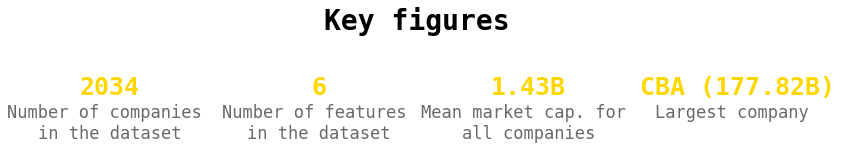

In [90]:
fig=plt.figure(figsize=(5,2),facecolor='white')

num_companies = df.nunique()["ASX code"]
mean_marketcap = df.mean()["Market Cap"]
largest_company_code = (df.loc[df["Market Cap"].argmax()])["ASX code"]
largest_company_cap = (df.loc[df["Market Cap"].argmax()])["Market Cap"]

ax0=fig.add_subplot(1,1,1)
ax0.text(1.1,1,"Key figures",color='black',fontsize=28, fontweight='bold', fontfamily='monospace',ha='center')

ax0.text(0,0.4,f"{num_companies}",color='gold',fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(0,0.001,"Number of companies \nin the dataset",color='dimgrey',fontsize=17, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(0.75,0.4,"6",color='gold',fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(0.75,0.001,"Number of features \nin the dataset",color='dimgrey',fontsize=17, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(1.5,0.4,f"{human_format(mean_marketcap)}",color='gold',fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(1.5,0.001,"Mean market cap. for \nall companies",color='dimgrey',fontsize=17, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(2.25,0.4,f"{largest_company_code} ({human_format(largest_company_cap)})", color='gold',fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(2.25,0.001,"Largest company \n",color='dimgrey',fontsize=17, fontweight='light', fontfamily='monospace',ha='center')

ax0.set_yticklabels('')
ax0.tick_params(axis='y',length=0)
ax0.tick_params(axis='x',length=0)
ax0.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax0.spines[direction].set_visible(False)

## Univariate analysis of continuous variable (Market Cap.)

In [59]:
df[df["Market Cap"]!=0]

,ASX code,Company name,Listing date,GICs industry group,Market Cap
0,14D,1414 DEGREES LIMITED,2018-09-12,Capital Goods,25038807.0
1,1AD,ADALTA LIMITED,2016-08-22,"Pharmaceuticals, Biotechnology & Life Sciences",33098740.0
2,1AG,ALTERRA LIMITED,2008-05-16,Commercial & Professional Services,12039420.0
3,1ST,1ST GROUP LIMITED,2015-06-09,Health Care Equipment & Services,8916955.0
6,2BE,TUBI LIMITED,2019-06-14,Energy,NaN
...,...,...,...,...,...
2042,ZLD,ZELIRA THERAPEUTICS LIMITED,2003-07-28,"Pharmaceuticals, Biotechnology & Life Sciences",53564533.0
2043,ZMI,ZINC OF IRELAND NL,2007-09-18,Materials,7376541.0
2044,ZMM,ZIMI LIMITED,2007-09-10,Technology Hardware & Equipment,10857340.0
2045,ZNC,ZENITH MINERALS LIMITED,2007-05-29,Materials,70646407.0


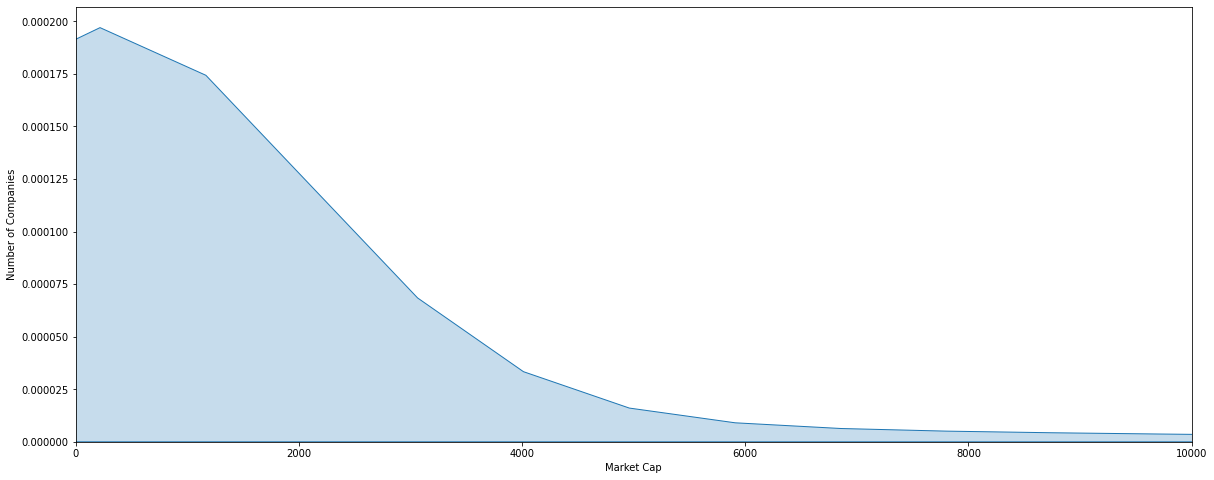

In [69]:
nozero_df = df[df["Market Cap"]!=0]
plt.figure(figsize=(20, 8))
plt.xlim(0, 10000)
plt.xlabel("Market Cap")
plt.ylabel("Density")
sns.kdeplot(nozero_df["Market Cap"].div(1e6), shade=True)
plt.show()

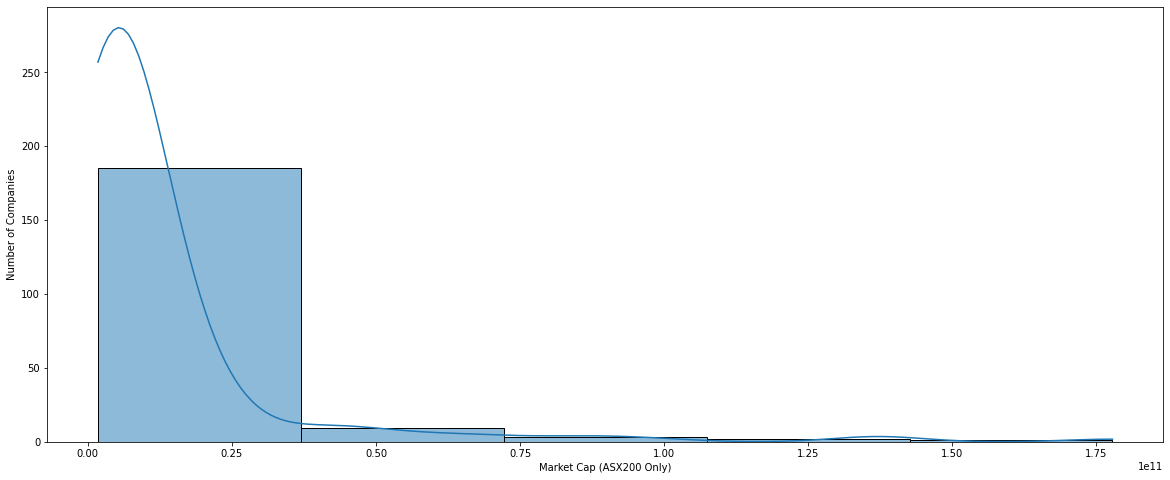

In [109]:
plt.figure(figsize=(20, 8))
# plt.xlim(df_200["Market Cap"].min(), df_200["Market Cap"].max())
plt.xlabel("Market Cap (ASX200 Only)")
plt.ylabel("Number of Companies")
sns.histplot(df_200["Market Cap"], bins=5, kde=True)
plt.show()

In [112]:
df_200["ASX code"].tolist()

['CBA',
 'BHP',
 'CSL',
 'WBC',
 'NAB',
 'ANZ',
 'FMG',
 'WES',
 'MQG',
 'WOW',
 'RMD',
 'RIO',
 'TLS',
 'TCL',
 'GMG',
 'APT',
 'ALL',
 'AMC',
 'WPL',
 'REA',
 'COL',
 'NCM',
 'JHX',
 'XRO',
 'NWS',
 'SHL',
 'URW',
 'FPH',
 'QBE',
 'BXB',
 'COH',
 'SYD',
 'STO',
 'REH',
 'ASX',
 'SCG',
 'RHC',
 'SUN',
 'S32',
 'IAG',
 'MEZ',
 'NST',
 'MGR',
 'DXS',
 'TAH',
 'SEK',
 'SGP',
 'TPG',
 'APA',
 'KLA',
 'BSL',
 'DMP',
 'JHG',
 'WTC',
 'CPU',
 'AIA',
 'AGG',
 'MFG',
 'GPT',
 'AFI',
 'MIN',
 'QAN',
 'MPL',
 'TWE',
 'LLC',
 'ORG',
 'CWN',
 'SPK',
 'MCY',
 'OSH',
 'BLD',
 'EVN',
 'CEN',
 'SVW',
 'VCX',
 'OZL',
 'CHC',
 'SOL',
 'ALD',
 'AZJ',
 'AST',
 'IEL',
 'HVN',
 'ARG',
 'WOR',
 'CIM',
 'ALQ',
 'ALX',
 'QUB',
 'BOQ',
 'PME',
 'BEN',
 'AGL',
 'FBU',
 'IGO',
 'CWY',
 'CAR',
 'JBH',
 'ORI',
 'NXT',
 'ANN',
 'VUK',
 'NEC',
 'IFT',
 'EBO',
 'LYC',
 'ALU',
 'AWC',
 'SSR',
 'IPL',
 'Z1P',
 'A2M',
 'PMV',
 'PLS',
 'BRG',
 'RWC',
 'APE',
 'AMP',
 'NWL',
 'DOW',
 'MLT',
 'SKI',
 'SDF',
 'MTS',
 'ARB',
